# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Da error 403 y es porque 'El cliente no posee los permisos necesarios para cierto contenido, por lo que el servidor está rechazando otorgar una respuesta apropiada.'
import requests
import time

url = " https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url, time.sleep(10)).text

# If not information is extracted, then connect as anonymous
if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text


In [3]:
pip install beautifulsoup4 pandas


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser")
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

In [5]:
# Se busca las tablas
tablas = soup.find_all('table')
tablas


[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$4,046</td>
 </tr>
 <t

In [6]:
import pandas as pd

for index, table in enumerate(tablas):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

# Create a DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tablas[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

        
tesla_revenue.head()

,Date,Revenue
0,2023-06-30,24927
1,2023-03-31,23329
2,2022-12-31,24318
3,2022-09-30,21454
4,2022-06-30,16934


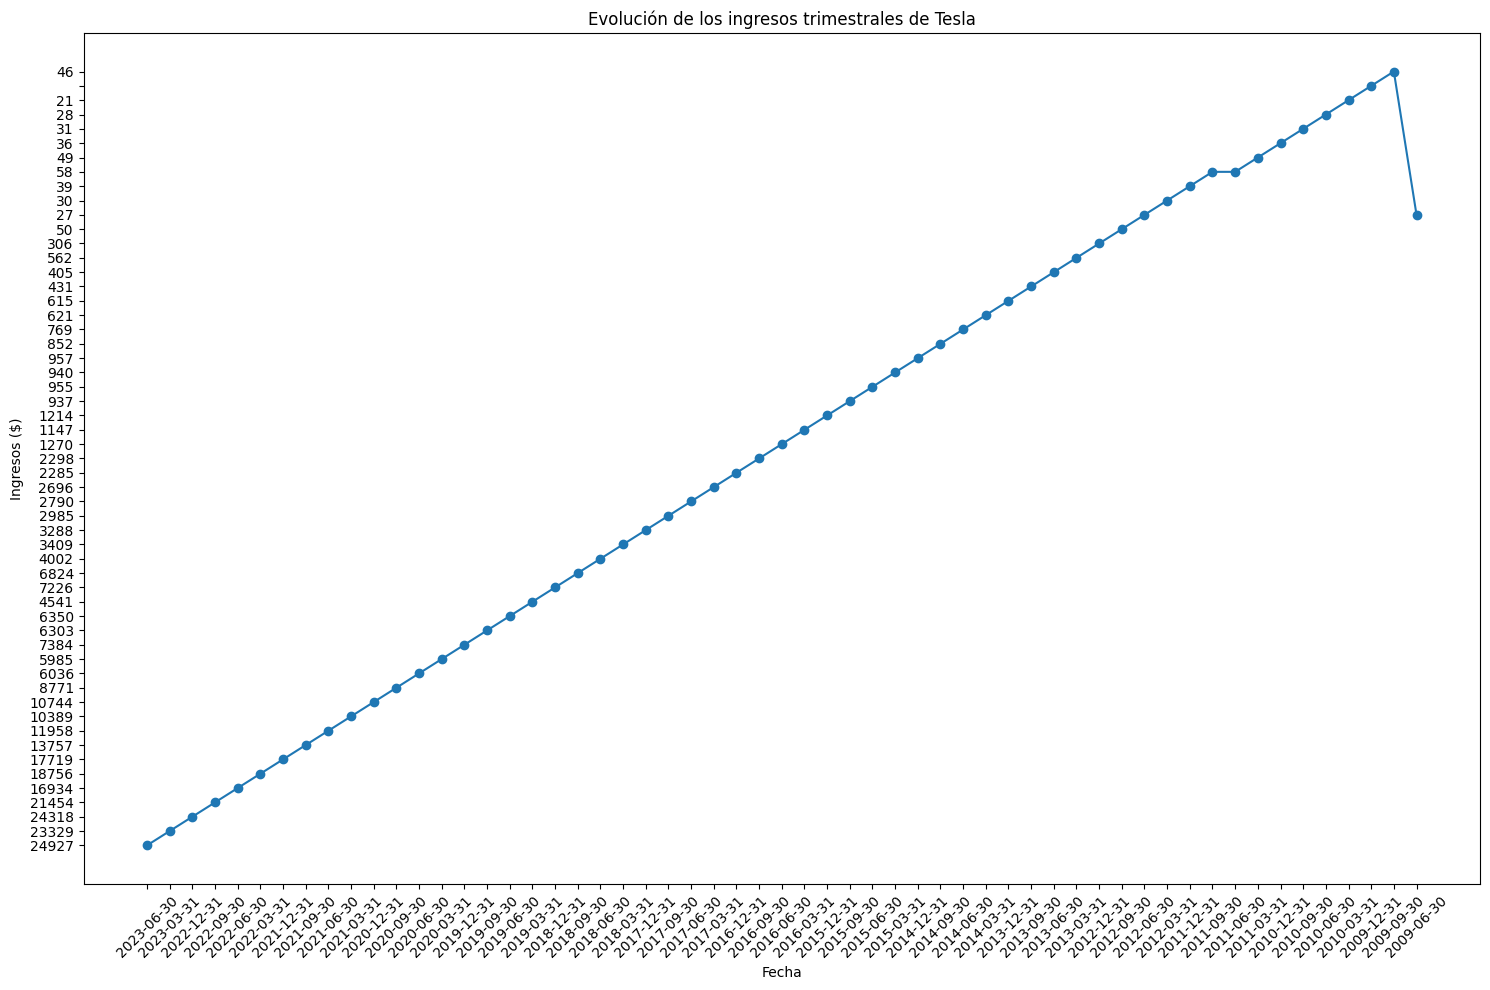

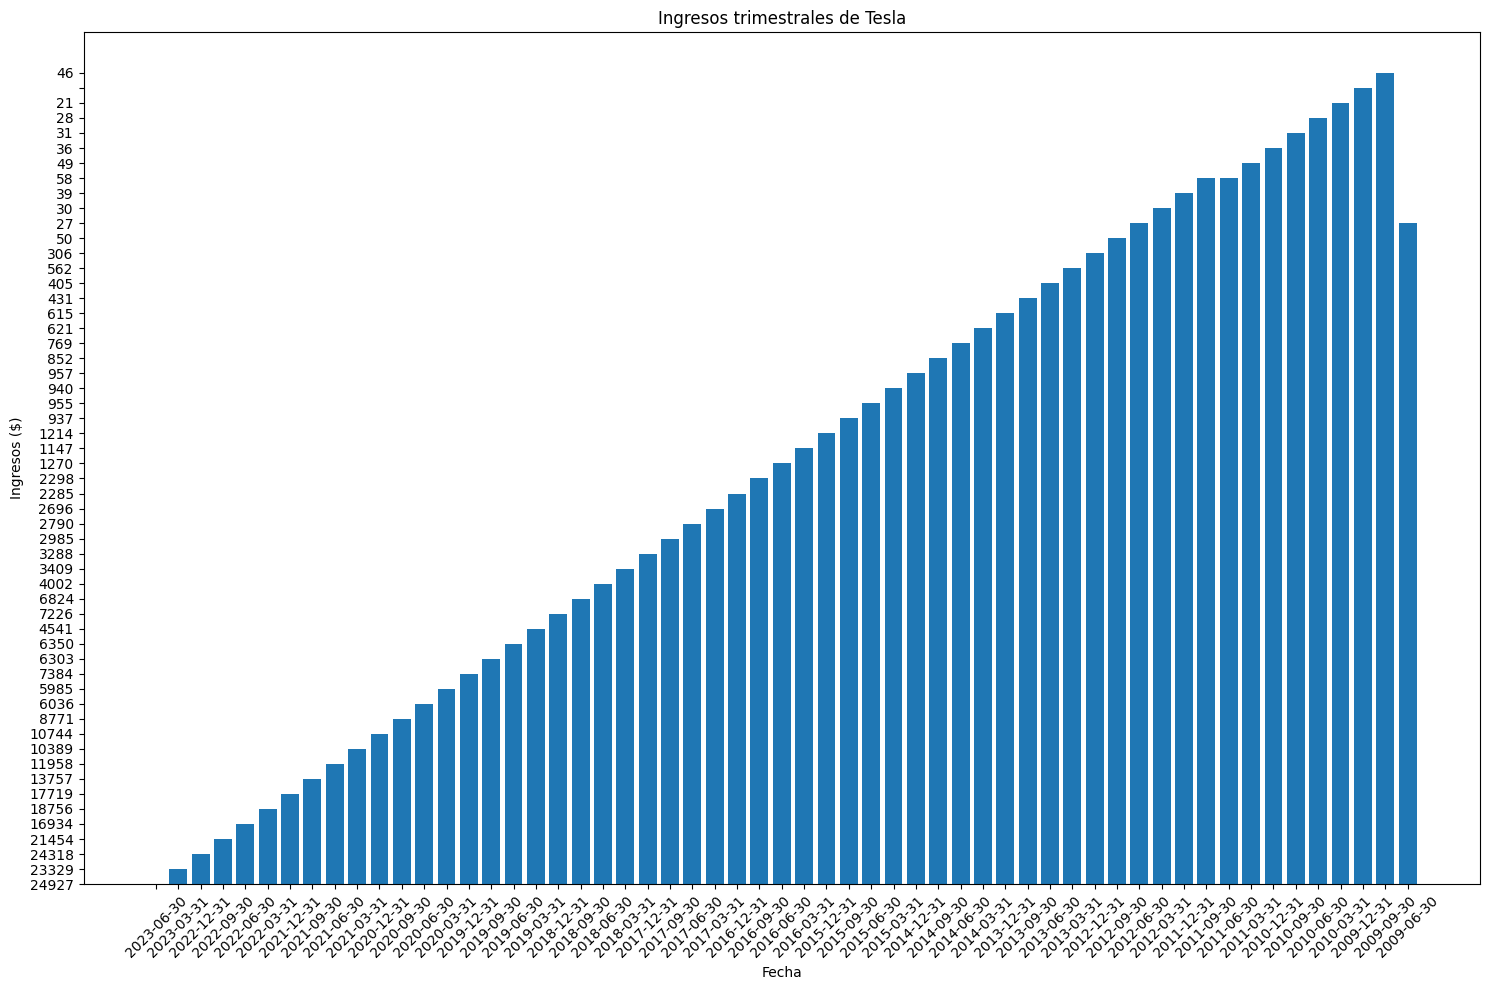

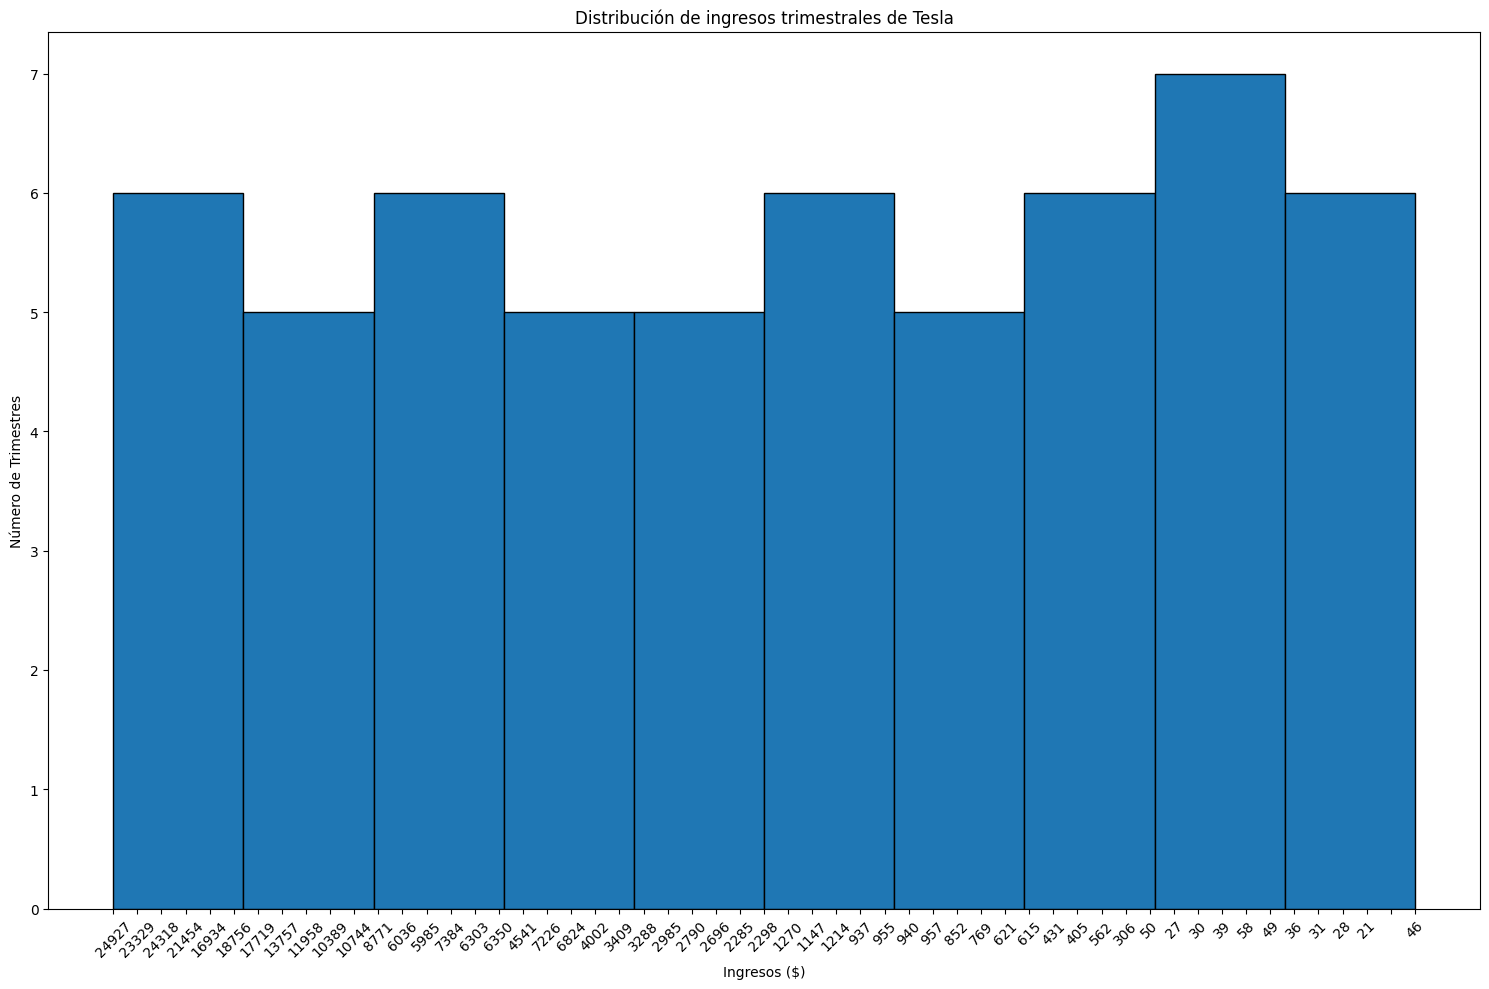

In [7]:
import sqlite3

conn = sqlite3.connect('tesla_revenue.db')
cursor = conn.cursor()

# Crear la tabla

cursor.execute('''
CREATE TABLE IF NOT EXISTS tesla_revenue (
    id INTEGER PRIMARY KEY,
    Date TEXT NOT NULL,
    Revenue REAL NOT NULL
)
''')

# Insertar datos en la base de datos

for _, row in tesla_revenue.iterrows():
    cursor.execute('''
    INSERT INTO tesla_revenue (Date, Revenue)
    VALUES (?, ?)
    ''', (row['Date'], row['Revenue']))

# Guardar los cambios

conn.commit() 

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Línea
plt.figure(figsize=(15,10))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], marker='o', linestyle='-')
plt.title("Evolución de los ingresos trimestrales de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de Barras
plt.figure(figsize=(15,10))
plt.bar(tesla_revenue['Date'], tesla_revenue['Revenue'])
plt.title("Ingresos trimestrales de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma
plt.figure(figsize=(15,10))
plt.hist(tesla_revenue['Revenue'], bins=10, edgecolor='black')
plt.title("Distribución de ingresos trimestrales de Tesla")
plt.xlabel("Ingresos ($)")
plt.ylabel("Número de Trimestres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()